# Статистический анализ данных

# Определение перспективного тарифа для телеком-компании

Цели и задачи проекта: Сделать предварительный анализ тарифов на небольшой выборке клиентов, по данным 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**План выполнения:**

**1. Открыть файл с данными и изучить общую информацию**

**2. Подготовить данные**

- Привести данные к нужным типам;
- Найти и исправить ошибки в данных, если они есть
- Посчитать для каждого пользователя:
    - количество сделанных звонков и израсходованных минут разговора по месяцам;
    - количество отправленных сообщений по месяцам;
    - объем израсходованного интернет-трафика по месяцам;
    - помесячную выручку с каждого пользователя (вычесть бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножить на значение из тарифного плана; прибавить абонентскую плату, соответствующую тарифному плану).

**3. Проанализировать данные**

- Опишисать поведение клиентов оператора, исходя из выборки. Посчитать сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Посчитать среднее количество, дисперсию и стандартное отклонение. Построить гистограммы. Описать распределения.

**4. Проверить гипотезы**

- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
- пояснить формулировку нулевой и альтернативный гипотезы;
- пояснить какой критерий использовать для проверки гипотез и почему

**5. Написать общий вывод**

# Описание данных
**Таблица users (информация о пользователях):**

-    user_id — уникальный идентификатор пользователя
-    first_name — имя пользователя
-    last_name — фамилия пользователя
-    age — возраст пользователя (годы)
-    reg_date — дата подключения тарифа (день, месяц, год)
-    churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
-    city — город проживания пользователя
-    tariff — название тарифного плана

**Таблица calls (информация о звонках):**

-    id — уникальный номер звонка
-    call_date — дата звонка
-    duration — длительность звонка в минутах
-    user_id — идентификатор пользователя, сделавшего звонок

**Таблица messages (информация о сообщениях):**

-    id — уникальный номер сообщения
-    message_date — дата сообщения
-    user_id — идентификатор пользователя, отправившего сообщение

**Таблица internet (информация об интернет-сессиях):**

-    id — уникальный номер сессии
-    mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
-    session_date — дата интернет-сессии
-    user_id — идентификатор пользователя

**Таблица tariffs (информация о тарифах):**

-    tariff_name — название тарифа
-    rub_monthly_fee — ежемесячная абонентская плата в рублях
-    minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
-    messages_included — количество сообщений в месяц, включённых в абонентскую плату
-    mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
-    rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
-    rub_per_message — стоимость отправки сообщения сверх тарифного пакета
-    rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

# Шаг 1. Открыть файл с данными и изучить общую информацию

In [1]:
#подключаем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats as st

In [2]:
#загружаем данные
users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
messages = pd.read_csv('/datasets/messages.csv')
internet = pd.read_csv('/datasets/internet.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')

In [3]:
#производим общий осмотр данных users
users.head(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [5]:
users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


In [6]:
users.duplicated().sum()

0

In [7]:
users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

По таблице users:

- 500 записей, дубликатов нет, 462 пропуска только в столбце churn_date.
- Пропуски в столбце churn_date говорят о том, что пользователь продолжал пользоваться тарифом на момент выгрузки данных. 
- Минимальный возраст пользователя - 18 лет, максимальный - 75 лет
- reg_date, churn_date необходимо перевести в формат Datetime (на момент выгрузки формат этого столбца - object).
- Столбец tariff можно перевести в формат int (на момент выгрузки формат этого столбца - object), при этом составить словарь, к которому сможем ссылаться при необходимости

In [8]:
#производим общий осмотр данных calls
calls.tail(5)

,id,call_date,duration,user_id
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499
202606,1499_219,2018-12-14,19.62,1499


In [9]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [10]:
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [11]:
calls.duplicated().sum()

0

In [12]:
calls.isna().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

По таблице calls:

- 202607 записей, дубликатов нет, пропусков нет.
- В столбце id происходит дублирование информации столбца user_id, можно удалить информацию (а именно первые 4 цифры) по пользователю из столбца id (идентификатор звонка).
- После удаления дублирующейся информации переведем этот столбец (id) в формат int (на момент выгрузки формат этого столбца - object).
- call_date переведем в формат Datetime (на момент выгрузки формат этого столбца - object).
- по столбцу duration, минимальное количество минут разговора - 0, это пропущенные звонки. В будущем можно создать столбец missing_call формата bool, куда переведем все звонки с 0 минутами. Максимальное количество минут - 38. От заказчика есть информация, что минута округляется в большую сторону. Следовательно, округлим duration в большую сторону, при этом формат присвоим int (на момент выгрузки формат этого столбца - float64).

In [13]:
#производим общий осмотр данных messages
messages.head(5)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [14]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [15]:
messages.describe()

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


In [16]:
messages.duplicated().sum()

0

In [17]:
messages.isna().sum()

id              0
message_date    0
user_id         0
dtype: int64

По таблице messages:

- 123036 записей, дубликатов нет, пропусков нет.
- В столбце id происходит дублирование информации столбца user_id, можно удалить информацию (а именно первые 4 цифры) по пользователю из столбца id (идентификатор звонка).
- После удаления дублирующейся информации переведем этот столбец (id) в формат int (на момент выгрузки формат этого столбца - object).
- message_date переведем в формат Datetime (на момент выгрузки формат этого столбца - object).

In [18]:
#производим общий осмотр данных internet
internet.head(5)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [19]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [20]:
internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


In [21]:
internet.duplicated().sum()

0

In [22]:
internet.isna().sum()

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

По таблице internet:

- 149396 записей, дубликатов нет, пропусков нет.
- В столбце id происходит дублирование информации столбца user_id, можно удалить информацию (а именно первые 4 цифры) по пользователю из столбца id (идентификатор звонка).
- После удаления дублирующейся информации переведем этот столбец (id) в формат int (на момент выгрузки формат этого столбца - object).
- session_date переведем в формат Datetime (на момент выгрузки формат этого столбца - object).
- по столбцу mb_used, минимальное количество использованного интернет-трафика (в мегабайтах) - 0. Максимальное количество использованного интернет-трафика (в мегабайтах) - 1724.83. От заказчика есть информация, что интернет-трафик округляется в большую сторону до гигабайта, если есть превыше в трафике. Для улучшения визуализации округлим mb_used в большую сторону, при этом формат присвоим int (на момент выгрузки формат этого столбца - float64). * 1ГБ = 1024 МБ
- Столбец Unnamed: 0 - не несет полезной информации, это просто энумератор, которые наверняка забыли удалить. Необходимо сообщить заказчику об этом, чтобы в будущем не заполнять базу данных лишними столбцами.

In [23]:
#производим общий осмотр данных tariffs
tariffs.head(5)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [24]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [25]:
tariffs.describe()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


In [26]:
tariffs.duplicated().sum()

0

In [27]:
tariffs.isna().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

По таблице tariffs:

- 2 записи, дубликатов нет, пропусков нет.
- Дано представление о двух тарифах:

**Тариф «Смарт»**

    Ежемесячная плата: 550 рублей
    Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
    Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.
    
**Тариф «Ультра»**

    Ежемесячная плата: 1950 рублей
    Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
    Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

**Общий вывод по шагу 1:**

- Были проанализированы данные по пяти таблицам. Выделены проблемные места, на которые стоит обратить внимание (по пропускам, формату данных, приведению к репрезентативному виду).
- Можно приступать ко второму шагу по подготовке данных к анализу.

# Шаг 2. Подготовка данных

**2.1. Подготовка данных в таблице users**

In [28]:
#добавим словарь к столбцу tariff, а в исходной таблице users заменим текстовые строки на int значения
tariff_dict = {'smart':0, 'ultra':1}
users['tariff'] = pd.to_numeric(users['tariff'].map(tariff_dict), downcast = 'integer')

In [29]:
#преобразуем формат reg_date и churn_date в Datetime
users['reg_date'] = pd.to_datetime(users['reg_date'], format = "%Y-%m-%d")
users['churn_date'] = pd.to_datetime(users['churn_date'], format = "%Y-%m-%d")

In [30]:
#проверяем форматы
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null int8
dtypes: datetime64[ns](2), int64(2), int8(1), object(3)
memory usage: 28.0+ KB


**2.2. Подготовка данных в таблице calls**

In [31]:
#в столбце id оставим данные только по номеру звонка, удалив при этом символы до "_".
calls['id'] = calls['id'].str.split('_').str[1].astype('int')

In [32]:
#преобразуем формат данных столбца call_date в Datetime
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')

In [33]:
#округлим duration в большую сторону + переведем в int
calls['duration'] = calls['duration'].apply(np.ceil).astype('int')

In [34]:
#проверяем форматы
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null int64
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 6.2 MB


**2.3. Подготовка данных в таблице messages**

In [35]:
#в столбце id оставим данные только по номеру звонка, удалив при этом символы до "_".
messages['id'] = messages['id'].str.split('_').str[1].astype('int')

In [36]:
#преобразуем формат данных столбца message_date в Datetime
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')

In [37]:
#проверяем форматы
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null int64
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.8 MB


**2.4. Подготовка данных в таблице internet**

In [38]:
#в столбце id оставим данные только по номеру звонка, удалив при этом символы до "_".
internet['id'] = internet['id'].str.split('_').str[1].astype('int')

In [39]:
#преобразуем формат данных столбца message_date в Datetime
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')

In [40]:
#на данном этапе просто округлим duration в большую сторону + переведем в int
internet['mb_used'] = internet['mb_used'].apply(np.ceil).astype('int')

In [41]:
#удалим столбец Unnamed: 0
internet.drop(['Unnamed: 0'], axis = 1)

,id,mb_used,session_date,user_id
0,0,113,2018-11-25,1000
1,1,1053,2018-09-07,1000
2,2,1198,2018-06-25,1000
3,3,551,2018-08-22,1000
4,4,303,2018-09-24,1000
...,...,...,...,...
149391,152,319,2018-10-03,1499
149392,153,491,2018-12-14,1499
149393,154,0,2018-10-27,1499
149394,155,1247,2018-11-26,1499


In [42]:
#проверяем форматы
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null int64
mb_used         149396 non-null int64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), int64(4)
memory usage: 5.7 MB


*Расчет:* количество сделанных звонков и израсходованных минут разговора по месяцам;

In [43]:
calls['month_of_call'] = calls['call_date'].dt.month
calls_per_month = calls.pivot_table(index='month_of_call', values='duration', aggfunc=['count', 'sum']) #.rename(columns={'count':'number_of_calls', 'sum':'duration_of_calls', 'duration': ''})
calls_per_month

,count,sum
,duration,duration
month_of_call,,
1,1476,10784
2,3328,24455
3,6687,48151
4,9272,66310
5,12647,88810
6,14716,105180
7,18298,131746
8,21488,153698


In [44]:
#добавленный код v.1
calls['year_of_call'] = calls['call_date'].dt.year
calls_per_year_and_month = calls.pivot_table(index=['year_of_call', 'month_of_call'], values='duration', aggfunc=['count', 'sum'])
calls_per_year_and_month

count      sum
                           duration duration
year_of_call month_of_call                  
2018         1                 1476    10784
             2                 3328    24455
             3                 6687    48151
             4                 9272    66310
             5                12647    88810
             6                14716   105180
             7                18298   131746
             8                21488   153698
             9                24061   173475
             10               27146   193928
             11               29501   210089
             12               33987   243675

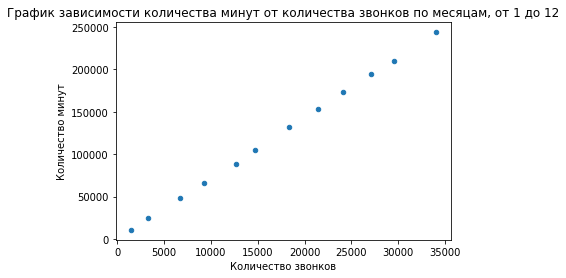

In [44]:
calls_per_month.plot(kind = 'scatter', x=('count','duration'),y=('sum','duration'))
plt.title("График зависимости количества минут от количества звонков по месяцам, от 1 до 12")
plt.xlabel("Количество звонков")
plt.ylabel("Количество минут")
plt.show()

Можно увидеть равномерное увеличение количества звонков и минут от января к декабрю, возможно, это связано с увеличивающейся популярностью компании на рынке.

*Расчет:* количество отправленных сообщений по месяцам;

In [45]:
messages['month_of_message'] = messages['message_date'].dt.month
messages_per_month = messages.pivot_table(index='month_of_message', values='id', aggfunc='count') #.rename(columns={'count':'number_of_calls', 'sum':'duration_of_calls', 'duration': ''})
messages_per_month

,id
month_of_message,
1,924
2,1924
3,3648
4,5179
5,7298
6,8983
7,11320
8,13088
9,14759


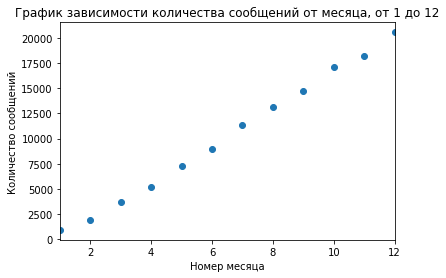

In [46]:
messages_per_month.plot(style = 'o', legend=False)
plt.title("График зависимости количества сообщений от месяца, от 1 до 12")
plt.xlabel("Номер месяца")
plt.ylabel("Количество сообщений")
plt.show()

Можно увидеть равномерное увеличение количества сообщений от января к декабрю, возможно, это связано с увеличивающейся популярностью компании на рынке.

*Расчет:* объем израсходованного интернет-трафика по месяцам;

In [47]:
internet['month_of_session'] = internet['session_date'].dt.month
sessions_per_month = internet.pivot_table(index='month_of_session', values='mb_used', aggfunc=['count', 'sum']) #.rename(columns={'count':'number_of_calls', 'sum':'duration_of_calls', 'duration': ''})
sessions_per_month

,count,sum
,mb_used,mb_used
month_of_session,,
1,1117,408213
2,2641,956348
3,4885,1813960
4,6511,2436111
5,9408,3529893
6,11057,4184770
7,13548,5035299
8,16092,6005126


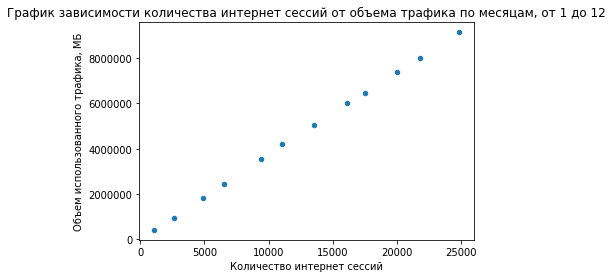

In [48]:
sessions_per_month.plot(kind = 'scatter', x=('count','mb_used'),y=('sum','mb_used'))
plt.title("График зависимости количества интернет сессий от объема трафика по месяцам, от 1 до 12")
plt.xlabel("Количество интернет сессий")
plt.ylabel("Объем использованного трафика, МБ")
plt.show()

Можно увидеть равномерное увеличение количества интернет сессий и использованного трафика от января к декабрю, возможно, это связано с увеличивающейся популярностью компании на рынке.

*Расчет:* помесячную выручку с каждого пользователя (вычесть бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножить на значение из тарифного плана; прибавить абонентскую плату, соответствующую тарифному плану).

In [49]:
#собираем данные по использованным мобильным услугам из таблиц calls, messages, internet воедино
calls_part = calls.groupby(['user_id', 'month_of_call'], as_index=False)['duration'].agg('sum')
calls_part.columns = ['user_id', 'month', 'call_minutes']

messages_part = messages.groupby(['user_id', 'month_of_message'], as_index=False)['id'].agg('count')
messages_part.columns = ['user_id', 'month', 'messages_number']

internet_part = internet.groupby(['user_id', 'month_of_session'], as_index=False)['mb_used'].agg('sum')
internet_part.columns = ['user_id', 'month', 'internet_traffic']

users_part = users[['user_id', 'tariff', 'city']]

In [50]:
#объединяем полученные выше таблицы
profit = (calls_part
         .merge(messages_part, on = ['user_id', 'month'], how = 'outer')
         .merge(internet_part, on = ['user_id', 'month'], how = 'outer')
         .merge(users_part, on = 'user_id', how = 'left')
         .join(tariffs, on = 'tariff', how = 'left') #join по столбцу tariff ищет соответствующие индексы таблицы tariffs
         )
profit

,user_id,month,call_minutes,messages_number,internet_traffic,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,5,159.0,22.0,2256.0,1,Краснодар,1000,30720,3000,1950,150,1,1,ultra
1,1000,6,172.0,60.0,23257.0,1,Краснодар,1000,30720,3000,1950,150,1,1,ultra
2,1000,7,340.0,75.0,14016.0,1,Краснодар,1000,30720,3000,1950,150,1,1,ultra
3,1000,8,408.0,81.0,14070.0,1,Краснодар,1000,30720,3000,1950,150,1,1,ultra
4,1000,9,466.0,57.0,14581.0,1,Краснодар,1000,30720,3000,1950,150,1,1,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,NaN,32.0,17232.0,0,Санкт-Петербург,50,15360,500,550,200,3,3,smart
3210,1489,10,NaN,21.0,19588.0,0,Санкт-Петербург,50,15360,500,550,200,3,3,smart
3211,1489,11,NaN,20.0,17516.0,0,Санкт-Петербург,50,15360,500,550,200,3,3,smart
3212,1489,12,NaN,35.0,17341.0,0,Санкт-Петербург,50,15360,500,550,200,3,3,smart


In [78]:
profit.user_id.nunique()

498

Значения NaN говорят о том, что клиент не пользовался определенной услугой в определенный месяц, заменим NaN на 0.

In [51]:
profit.loc[profit['call_minutes'].isna()==True, 'call_minutes'] = 0
profit.loc[profit['messages_number'].isna()==True, 'messages_number'] = 0
profit.loc[profit['internet_traffic'].isna()==True, 'internet_traffic'] = 0

In [52]:
#прописываем функцию для расчета выручки от каждого пользователя
def find_profit(row):
    profit_value = 0
    if (row['call_minutes'] > row['minutes_included']):
        profit_value += (row['call_minutes'] - row['minutes_included']) * row['rub_per_minute']
    if (row['messages_number'] > row['messages_included']):
        profit_value += (row['messages_number'] - row['messages_included']) * row['rub_per_message']
    if (row['internet_traffic'] > row['mb_per_month_included']):
        profit_value += math.ceil((row['internet_traffic'] - row['mb_per_month_included']) / 1024) * row['rub_per_gb']  
    profit_value += row['rub_monthly_fee']
    return profit_value

In [53]:
#используем функцию выше, чтобы добавить в profit значения выручек
profit['final_profit'] = profit.apply(find_profit, axis = 1)

In [79]:
profit['final_profit'].describe()

count    3214.000000
mean     1532.592097
std       799.651454
min       550.000000
25%       750.000000
50%      1667.500000
75%      1950.000000
max      6770.000000
Name: final_profit, dtype: float64

In [54]:
profit.isna().sum()

user_id                  0
month                    0
call_minutes             0
messages_number          0
internet_traffic         0
tariff                   0
city                     0
messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
final_profit             0
dtype: int64

Вывод по шагу 2:
- Данные подготовлены, пропусков нет, дубликатов нет
- Данные по минутам и интернет-трафику округлены в большую сторону. При этом для интернета в будущем необходимо создать столбец с интернет-трафиком, округленным до гигабайта.
- Номер звонка, смс, и использования интернета для каждого пользователя представлены в презентабельной форме, для улучшения репрезентативности итоговых таблиц
- для тарифов в таблице users создали словарь, это поможет улучшить визуализацию таблицы.
- для столбцов таблиц, которым присуще даты, был присвоен формат datetime, а для целочисленных integer.
- удалили ненужный столбец "Unnamed: 0" в таблице internet
- посчитали количество сделанных звонков и израсходованных минут разговора по месяцам; количество отправленных сообщений по месяцам; объем израсходованного интернет-трафика по месяцам; помесячную выручку с каждого пользователя.

# Шаг 3. Анализ данных

Посчитать сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Посчитать среднее количество, дисперсию и стандартное отклонение. Построить гистограммы. Описать распределения.

In [55]:
#напишем функция для нахождения статистических данных по столбцам для двух тарифов
def find_statistics(column, tariff):
    statistics = profit[profit['tariff_name'] == tariff].groupby('user_id')[column].agg('mean')
    print('Информация для тарифа {}: '.format(tariff))
    print('Среднее по тарифу {0} для данных по {1} равно: {2} '.format(tariff, column, round(statistics.mean(), 1)))
    print('Медиана по тарифу {0} для данных по {1} равно: {2} '.format(tariff, column, round(statistics.median(), 1)))
    print('Дисперсия по тарифу {0} для данных по {1} равна: {2} '.format(tariff, column, round(np.var(statistics), 1)))
    print('Стандартное отклонение по тарифу {0} для данных по {1} равно: {2} '.format(tariff, column, round(np.sqrt(np.var(statistics))), 1))
    return statistics

In [56]:
#напишем функция для построения гистограмм по двум тарифам
def build_hist(data_smart, data_ultra, column_name, xrange, bins):
    ax = data_smart.plot(kind='hist',
                        histtype = 'step',
                        bins = bins,
                        range = xrange,
                        alpha = 0.5,
                        linewidth = 4,
                        grid = True,
                        density = True,
                        legend = True,
                        label = column_name + ' тарифа smart')
    data_ultra.plot(kind ='hist',
                   histtype = 'step',
                   bins = bins,
                   ax = ax,
                   range = xrange,
                   alpha = 0.5,
                   linewidth = 4,
                   grid = True,
                   density = True,
                   legend = True,
                   label = column_name + ' тарифа ultra')
    #sns.set_style('darkgrid')
    ax.set_title('Плотность распределения параметра {}'.format(column_name), fontsize = 11)
    ax.set_xlabel('Среднемесячное значение параметра {}'.format(column_name), fontsize = 11)
    ax.set_ylabel('Плотность распределения {}'.format(column_name), fontsize = 11)
    plt.show()

In [57]:
call_minutes_smart = find_statistics('call_minutes', 'smart')

Информация для тарифа smart: 
Среднее по тарифу smart для данных по call_minutes равно: 419.6 
Медиана по тарифу smart для данных по call_minutes равно: 425.1 
Дисперсия по тарифу smart для данных по call_minutes равна: 20974.1 
Стандартное отклонение по тарифу smart для данных по call_minutes равно: 145 


In [58]:
call_minutes_ultra = find_statistics('call_minutes', 'ultra')

Информация для тарифа ultra: 
Среднее по тарифу ultra для данных по call_minutes равно: 527.8 
Медиана по тарифу ultra для данных по call_minutes равно: 514.5 
Дисперсия по тарифу ultra для данных по call_minutes равна: 78867.0 
Стандартное отклонение по тарифу ultra для данных по call_minutes равно: 281 


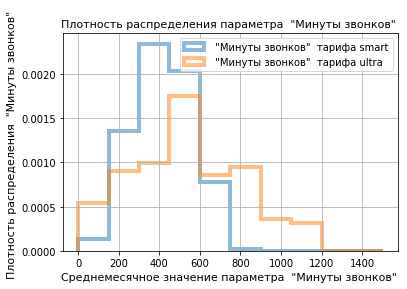

In [59]:
build_hist(call_minutes_smart, call_minutes_ultra, ' "Минуты звонков" ', xrange=(0,1500), bins = 10)

In [60]:
print('Доля клиентов с тарифом smart, которые превышают лимит 500 минут: {}'.format(
    round(len(call_minutes_smart[call_minutes_smart > 500])/len(call_minutes_smart), 2)))
print('Доля клиентов с тарифом ultra, которые превышают лимит 3000 минут: {}'.format(
    round(len(call_minutes_ultra[call_minutes_ultra > 3000])/len(call_minutes_ultra), 2)))

Доля клиентов с тарифом smart, которые превышают лимит 500 минут: 0.29
Доля клиентов с тарифом ultra, которые превышают лимит 3000 минут: 0.0


Вывод по графику для среднемесячного значения параметра "Минуты звонков":
- Распределения близки к нормальному распределению, гистограмма для тарифа ultra смещена в сторону больших значений относительно тарифа smart
- Для обоих тарифов среднее и медиана почти не отличаются
- Клиенты с тарифом ultra используют больше минут (в среднем = 528 мин), а с тарифом smart - меньше минут (в среднем = 420 мин)
- Стандартное отклонение и дисперсия для клиентов с тарифом ultra больше (ст. откл = 281), а для тарифа smart - меньше (ст. откл. = 145), это означает, что разброс в использованных минутах для клиентов с ultra - больше.
- Почти 30% всех клиентов с тарифом smart превышают лимит по минутам, а с тарифом ultra - не превышают минутный тариф

In [61]:
messages_number_smart = find_statistics('messages_number', 'smart')

Информация для тарифа smart: 
Среднее по тарифу smart для данных по messages_number равно: 32.4 
Медиана по тарифу smart для данных по messages_number равно: 27.8 
Дисперсия по тарифу smart для данных по messages_number равна: 700.9 
Стандартное отклонение по тарифу smart для данных по messages_number равно: 26 


In [62]:
messages_number_ultra = find_statistics('messages_number', 'ultra')

Информация для тарифа ultra: 
Среднее по тарифу ultra для данных по messages_number равно: 54.0 
Медиана по тарифу ultra для данных по messages_number равно: 45.5 
Дисперсия по тарифу ultra для данных по messages_number равна: 2135.3 
Стандартное отклонение по тарифу ultra для данных по messages_number равно: 46 


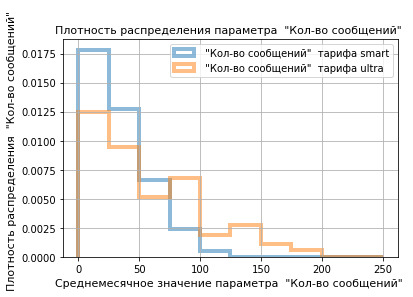

In [63]:
build_hist(messages_number_smart, messages_number_ultra, ' "Кол-во сообщений" ', xrange=(0,250), bins = 10)

In [64]:
print('Доля клиентов с тарифом smart, которые превышают лимит 50 сообщений: {}'.format(
    round(len(messages_number_smart[messages_number_smart > 50])/len(messages_number_smart), 2)))
print('Доля клиентов с тарифом ultra, которые превышают лимит 1000 сообщений: {}'.format(
    round(len(messages_number_ultra[messages_number_ultra > 1000])/len(messages_number_ultra), 2)))

Доля клиентов с тарифом smart, которые превышают лимит 50 сообщений: 0.23
Доля клиентов с тарифом ultra, которые превышают лимит 1000 сообщений: 0.0


Вывод по графику для среднемесячного значения параметра "Количество сообщений":
- Распределения близки к распределению Пуассона, гистограмма для тарифа ultra смещена в сторону больших значений относительно тарифа smart
- Для обоих тарифов среднее и медиана почти не отличаются
- Клиенты с тарифом ultra используют больше сообщений (в среднем = 54 сообщений), а с тарифом smart - меньше сообщений (в среднем = 32 сообщений)
- Стандартное отклонение и дисперсия для клиентов с тарифом ultra больше (ст. откл = 46), а для тарифа smart - меньше (ст. откл. = 26), это означает, что разброс в использованных сообщениях для клиентов с ultra - больше.
- Почти 23% всех клиентов с тарифом smart превышают лимит по сообщениям, а с тарифом ultra - не превышают кол-во сообщений по тарифу

In [65]:
internet_traffic_smart = find_statistics('internet_traffic', 'smart')

Информация для тарифа smart: 
Среднее по тарифу smart для данных по internet_traffic равно: 16201.4 
Медиана по тарифу smart для данных по internet_traffic равно: 16272.4 
Дисперсия по тарифу smart для данных по internet_traffic равна: 12805788.7 
Стандартное отклонение по тарифу smart для данных по internet_traffic равно: 3579 


In [66]:
internet_traffic_ultra = find_statistics('internet_traffic', 'ultra')

Информация для тарифа ultra: 
Среднее по тарифу ultra для данных по internet_traffic равно: 19592.8 
Медиана по тарифу ultra для данных по internet_traffic равно: 18715.6 
Дисперсия по тарифу ultra для данных по internet_traffic равна: 68734088.3 
Стандартное отклонение по тарифу ultra для данных по internet_traffic равно: 8291 


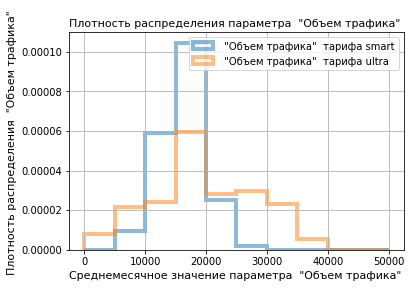

In [67]:
build_hist(internet_traffic_smart, internet_traffic_ultra, ' "Объем трафика" ', xrange=(0,50000), bins = 10)

In [68]:
print('Доля клиентов с тарифом smart, которые превышают лимит 15 ГБ: {}'.format(
    round(len(internet_traffic_smart[internet_traffic_smart / 1024 > 15])/len(internet_traffic_smart), 2)))
print('Доля клиентов с тарифом ultra, которые превышают лимит 30 ГБ: {}'.format(
    round(len(internet_traffic_ultra[internet_traffic_ultra / 1024 > 30])/len(internet_traffic_ultra), 2)))

Доля клиентов с тарифом smart, которые превышают лимит 15 ГБ: 0.62
Доля клиентов с тарифом ultra, которые превышают лимит 30 ГБ: 0.11


Вывод по графику для среднемесячного значения параметра "Объем трафика":
- Распределения близки к нормальному распределению, гистограмма для тарифа ultra смещена в сторону больших значений относительно тарифа smart
- Для обоих тарифов среднее и медиана почти не отличаются
- Клиенты с тарифом ultra используют больше интернет-трафика (в среднем = 16201.4 МБ), а с тарифом smart - меньше сообщений (в среднем = 19592.8 МБ)
- Стандартное отклонение и дисперсия для клиентов с тарифом ultra больше (ст. откл = 8291), а для тарифа smart - меньше (ст. откл. = 3579), это означает, что разброс в использованном интернет-трафике для клиентов с ultra - больше.
- Почти 62% всех клиентов с тарифом smart превышают лимит по интернету, а с тарифом ultra - около 11%.

Посмотрим на выручку:

In [69]:
profit_smart = find_statistics('final_profit', 'smart')

Информация для тарифа smart: 
Среднее по тарифу smart для данных по final_profit равно: 1329.7 
Медиана по тарифу smart для данных по final_profit равно: 1183.1 
Дисперсия по тарифу smart для данных по final_profit равна: 367217.1 
Стандартное отклонение по тарифу smart для данных по final_profit равно: 606 


In [70]:
profit_ultra = find_statistics('final_profit', 'ultra')

Информация для тарифа ultra: 
Среднее по тарифу ultra для данных по final_profit равно: 2087.4 
Медиана по тарифу ultra для данных по final_profit равно: 1950.0 
Дисперсия по тарифу ultra для данных по final_profit равна: 89897.6 
Стандартное отклонение по тарифу ultra для данных по final_profit равно: 300 


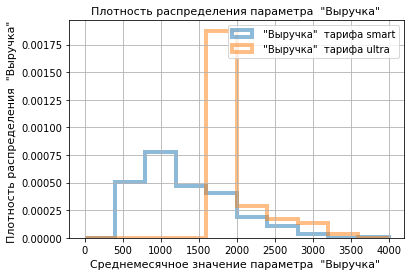

In [71]:
build_hist(profit_smart, profit_ultra, ' "Выручка" ', xrange=(0,4000), bins = 10)

In [72]:
if profit_smart.sum() > profit_ultra.sum():
    print('Клиенты с тарифом smart приносят больше выручки ({0}) компании, чем ultra ({1}). Разница составляет: {2}'
          .format(round(profit_smart.sum(), 2), round(profit_ultra.sum(), 2), round(profit_smart.sum() - profit_ultra.sum(), 2)))
else:
    print('Клиенты с тарифом ultra приносят больше выручки ({0}) компании, чем smart ({1}). Разница составляет: {2}'
          .format(round(profit_ultra.sum(), 2), round(profit_smart.sum(), 2), round(profit_ultra.sum() - profit_smart.sum(), 2)))
if profit_smart.sum() / profit_smart.count() > profit_ultra.sum() / profit_ultra.count():
    print('Средняя прибыль на одного клиента с тарифом smart больше ({0}), чем с ultra ({1}). Разница составляет: {2}'
          .format(round(profit_smart.sum() / profit_smart.count(), 2), round(profit_ultra.sum() / profit_ultra.count(), 2), round(profit_smart.sum() / profit_smart.count() - profit_ultra.sum() / profit_ultra.count(), 2)))
else: 
    print('Средняя прибыль на одного клиента с тарифом ultra больше ({0}), чем с smart ({1}). Разница составляет: {2}'
          .format(round(profit_ultra.sum() / profit_ultra.count(), 2), round(profit_smart.sum() / profit_smart.count(), 2), round(profit_ultra.sum() / profit_ultra.count() - profit_smart.sum() / profit_smart.count(), 2)))

Клиенты с тарифом smart приносят больше выручки (465404.27) компании, чем ultra (308937.78). Разница составляет: 156466.49
Средняя прибыль на одного клиента с тарифом ultra больше (2087.42), чем с smart (1329.73). Разница составляет: 757.69


Пик на гистограмме по тарифу ultra объясняется высокой абонентной платой. Однако, можно заметить, что клиенты с тарифом ultra реже превышают лимиты по тарифу и, соответственно, переплачивают. Для клиентов с smart можно заметить меньший по размеру пик и характерное смещение в правую сторону относительно ultra. Это говорит о том, что хоть smart и дешевле по тарифному плану, клиент в итоге может платить больше, чем за тариф ultra.
Тариф smart приносит больше прибыли, чем ultra, почти на 850 тыс, но прибыль на одного клиента для тарифа ultra больше (разница в прибыли на одного клиента составляет 776.43)

Вывод по пункту 3:
- Были проанализированы данные использования минут, сообщений и интернета для двух клиентов двух тарифом smart и ultra.
- Среднее использование минут, сообщений и интернета больше для клиентов с тарифом ultra.
- Доли клиентов, использующих тариф smart и превышающий объем услуг по тарифному плану, значительно больше по сравнению с клиентами с тарифом ultra. Доли превышений для тарифа smart составляет: 29% - для минут, 23% - для сообщений и 62% для интернета; по тарифу ultra: 0% для минут и сообщений, 11% для интернета
- Разброс значений в использованных минутах, сообщений и объеме интернета для клиентов с тарифом ultra больше, чем для smart. При этом данные для клиентов с тарифом ultra смещены в сторону больших значений относительно клиентов с smart.
- Для минут и интернета - распределение гистограмм близко к нормальному, а для сообщений - к распределению Пуассона.
- Для данных по трем категориям среднее и медиана почти не отличаются

# Шаг 4. Проверка гипотез

- пояснить формулировку нулевой и альтернативный гипотезы;
- пояснить какой критерий использовать для проверки гипотез и почему

**Проверяем гипотезу: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются**

Нулевая гипотеза H0:

"Средняя выручка пользователей тарифов «Ультра» равна «Смарт»"

Альтернативная гипотеза H1:

"Средняя выручка пользователей тарифов «Ультра» не равна «Смарт»"

Уровень значимости принимается: alpha = 0.05

Для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам (так как выборки не связаны между собой) используем метод scipy.stats.ttest_ind(array1, array_2, equal_var)

In [73]:
profit_smart = profit[profit['tariff_name']=='smart']['final_profit']
profit_ultra = profit[profit['tariff_name']=='ultra']['final_profit']

In [74]:
alpha = 0.05

results = st.ttest_ind(profit_smart, profit_ultra, equal_var = False) #False т.к. наблюдали разные дисперсии для выборок выше
print('p-значение', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение 2.7240946993530856e-246
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу, значит средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

**Проверяем гипотезу: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов**

Нулевая гипотеза H0:

"Средняя выручка пользователей из Москвы равна выручке пользователей из других регионов"

Альтернативная гипотеза H1:

"Средняя выручка пользователей из Москвы не равна выручке пользователей из других регионов"

Уровень значимости принимается: alpha = 0.05

Для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам (так как выборки не связаны между собой) используем метод scipy.stats.ttest_ind(array1, array_2, equal_var)

In [75]:
profit_moscow = profit[profit['city']=='Москва']['final_profit']
profit_not_moscow = profit[profit['city']!='Москва']['final_profit']

In [76]:
alpha = 0.05

results = st.ttest_ind(profit_moscow, profit_not_moscow, equal_var = False) #False т.к. наблюдали разные дисперсии для выборок выше
print('p-значение', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение 0.5126564657748214
Не получилось отвергнуть нулевую гипотезу


Не отвергаем нулевую гипотезу. Значит, принимаем, что средняя выручка по пользователям из Москвы равна выручке по пользователям из других регионов.

Выводы по проверке гипотез:
- Уровень значимости принят равным alpha = 0.05, общепринятое пороговое значение
- Для первой гипотезы. Отвергаем нулевую гипотезу H0. Принимаем альтернативную H1:
"Средняя выручка пользователей тарифов «Ультра» не равна «Смарт»"
- Для второй гипотезы. Не отвергаем нулевую гипотезу H0:
"Средняя выручка пользователей из Москвы равна выручке пользователей из других регионов"

# Шаг 5. Общий вывод

- Сделан предварительный анализ тарифов на небольшой выборке клиентов, по данным 500 пользователей «Мегалайна». Выделены и обработаны проблемные места в данных (по пропускам, формату данных, приведению к репрезентативному виду).
- Посчитано количество сделанных звонков и израсходованных минут разговора по месяцам; количество отправленных сообщений по месяцам; объем израсходованного интернет-трафика по месяцам; помесячную выручку с каждого пользователя. Было замечено равномерное увеличение количества количества минут, сообщений, интернет сессий и использованного трафика от января к декабрю. Возможно, это связано с увеличивающейся популярностью компании на рынке.
- Доли клиентов, использующих тариф smart и превышающий объем услуг по тарифному плану, значительно больше по сравнению с клиентами с тарифом ultra. Доли превышений абонентских услуг для тарифа smart составляет: 29% - для минут, 23% - для сообщений и 62% для интернета; по тарифу ultra: 0% для минут и сообщений, 11% для интернета
- Часть клиентов, которая использует тариф smart и не укладывается в лимит абонентского тарифа, платят в итоге большую сумму, чем могли бы заплатить за абонентскую плату по тарифу ultra.
- Разброс значений в использованных минутах, сообщений и объеме интернета для клиентов с тарифом ultra больше, чем для smart. При этом данные по использованным услугам (минуты, сообщения, интернет) для клиентов с тарифом ultra смещены в сторону больших значений относительно клиентов с smart.
- Для минут и интернета - распределение гистограмм близко к нормальному, а для сообщений - к распределению Пуассона.
- Для данных по трем категориям (минуты, сообщения, использованный интернет) среднее и медиана врамках одного тарифа почти не отличаются
- Были проверены две гипотезы. Принято, что средняя выручка пользователей тарифов «Ультра» не равна «Смарт», и что средняя выручка пользователей из Москвы равна выручке пользователей из других регионов" (Уровень значимости принят равным alpha = 0.05, общепринятое пороговое значение)
- Тариф smart приносит больше прибыли, чем ultra, почти на 850 тыс, но средняя прибыль на одного клиента для тарифа ultra больше (разница в прибыли на одного клиента составляет 776.43). Следовательно, «Мегалайну» необходимо сфокусироваться на продвижении тарифа ultra, это позволит, во-первых, уменьшить флуктуацию в прибыли и, во-вторых, увеличить свою итоговую прибыль.